In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
os.chdir("/content/drive/MyDrive/ColabNotebooks/Cursos/MetodosComputacionalesI/")
!ls

GitStuff  ProyectoML  Semana1	Semana2  Semana4  Semana6  Semana8
Parcial2  README.md   Semana10	Semana3  Semana5  Semana7  Semana9


In [ ]:
#file = '/content/drive/MyDrive/ColabNotebooks/Cursos/MetodosComputacionalesI/Semana10/Data/MinimosLineal.txt'
file = '/content/drive/MyDrive/ColabNotebooks/Cursos/MetodosComputacionalesI/Semana10/Data/Exponencial.dat'
file

'/content/drive/MyDrive/ColabNotebooks/Cursos/MetodosComputacionalesI/Semana10/Data/Exponencial.dat'

In [2]:
data = pd.read_csv(file,sep=' ')
data.columns = ['x','y']
x = np.array(data['x'])
y = np.array(data['y'])

sigma = np.random.normal(1,2,len(x))
sigma = np.abs(sigma)
sigma

NameError: name 'file' is not defined

Text(0, 0.5, 'y')

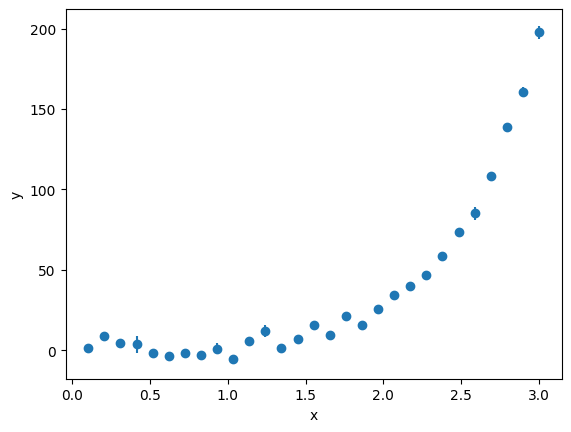

In [ ]:
plt.errorbar(x,y,yerr=sigma,fmt='o')
plt.xlabel('x')
plt.ylabel('y')

In [ ]:
import scipy.optimize as spo

In [ ]:
def GetModel1(x,p):
  y = 0.
  for n in range(len(p)):
    y += p[n]*x**n
  return y

In [ ]:
def GetModel2(x,p):
  y = p[0]*np.exp(p[1]*x)
  return y

In [ ]:
def Chi2(p,x,y,sigma,Model):
  return np.sum(((y-Model(x,p))/sigma)**2)

In [ ]:
p0 = np.ones(5)
p0

array([1., 1., 1., 1., 1.])

In [ ]:
nll = lambda *p: Chi2(*p)

In [ ]:
result = spo.minimize(nll,p0,args=(x,y,sigma,GetModel1), options={"disp":True})

         Current function value: 308.861473
         Iterations: 14
         Function evaluations: 264
         Gradient evaluations: 42


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:708: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


In [ ]:
p0 = np.ones(2)
result1 = spo.minimize(nll,p0,args=(x,y,sigma,GetModel2), options={"disp":True})
param2 = result1.x
param2

         Current function value: 1347.513862
         Iterations: 43
         Function evaluations: 309
         Gradient evaluations: 103


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:708: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


array([0.51889078, 1.98683727])

In [ ]:
param = result.x
t = np.linspace(min(x),max(x),100)
param

array([ 19.48469217, -90.48991781, 120.91321157, -62.86178299,
        13.00160405])

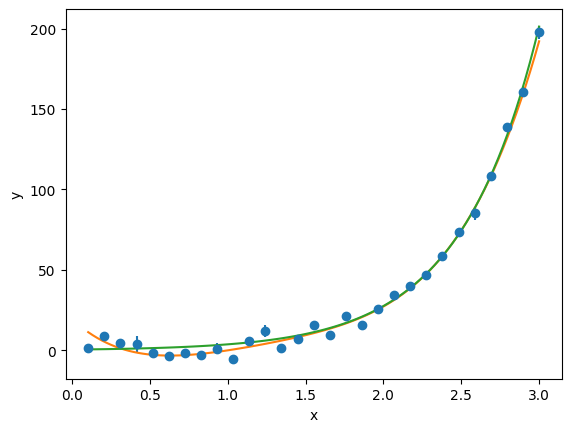

In [ ]:
plt.errorbar(x,y,yerr=sigma,fmt='o')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(t,GetModel1(t,param))
plt.plot(t,GetModel2(t,param2))
